In [1]:
# !pip install hvplot

## Preprocessing

In [ ]:
# Importing dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint

# Importing and reading the charity_data.csv file
import pandas as pd
import hvplot.pandas

# Ignoring warning messages that might be generated during the execution of the program
import warnings
warnings.filterwarnings('ignore')

# Importing holoviews to save plots as png files
import holoviews as hv
import os

# Importing the required libraries for the deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# In Attempt2 dropping the non-beneficial ID column, 'NAME'
# application_df = application_df.drop(columns=["NAME"], axis=1)
# application_df.head()

In [ ]:
# In Attempt2 dropping the non-beneficial ID column, 'EIN'
application_df = application_df.drop(columns=["EIN"], axis=1)
application_df.head(2)

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [ ]:
# Determining the number of unique values in each column
unique_counts = application_df.nunique()
unique_counts

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [ ]:
# Looking at APPLICATION_TYPE value counts for binning
application_counts2 = application_df["NAME"].value_counts()
# Looking first 100 rows
application_counts2.head(100)

PARENT BOOSTER USA INC                                          1260
TOPS CLUB INC                                                    765
UNITED STATES BOWLING CONGRESS INC                               700
WASHINGTON STATE UNIVERSITY                                      492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                  408
                                                                ... 
DAUGHTERS OF ESTHER FELLOWSHIP INTERNATIONAL MINISTRIES INC       24
FUTURE FARMERS OF AMERICA STATE ASSOCIATIONS & LOCAL CHAPTER      24
INTERNATIONAL FEDERATION OF FLY FISHERS INC                       24
BETTER WORLD FUND                                                 23
DEPARTMENT OF WYOMING VFW AUXILIARY                               23
Name: NAME, Length: 100, dtype: int64

In [ ]:
# Iterating through columns and print the data points for columns with more than 10 unique values
# for column, unique_count in unique_counts.items():
#     if unique_count > 10:
#         print(f"Column: {column}")
#         unique_values = application_df[column].unique()
#         for value in unique_values:
#             count = application_df[application_df[column] == value].shape[0]
#             print(f"Value: {value}, Count: {count}")
#         print("=" * 30)

In [ ]:
# Choosing a cutoff value and creating a list of application types to be replaced by using the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts2[application_counts2 < 50].index)

# Replacing in dataframe
for app in application_types_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")

# Checking to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                 24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [ ]:
# Looking at CLASSIFICATION value counts for binning
classification_counts_bining2 = application_df.CLASSIFICATION.value_counts()
classification_counts_bining2

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# Looking at CLASSIFICATION value counts >1
classification_counts2 = classification_counts_bining2[classification_counts_bining2 > 1]
classification_counts2

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Choosing a cutoff value and creating a list of classifications to be replaced using the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts2[classification_counts2 < 120].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other      977
C7000      777
C1700      287
C4000      194
C1370        1
C1236        1
C2190        1
C4200        1
C5200        1
C1820        1
C2600        1
C1248        1
C6100        1
C1580        1
C1900        1
C2570        1
C2380        1
C3700        1
C2500        1
C1570        1
C1283        1
C1732        1
C1728        1
C2170        1
C4120        1
C8210        1
C4500        1
C1245        1
C2561        1
C2150        1
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Converting categorical data to numeric with `pd.get_dummies`
numeric_application_df = pd.get_dummies(application_df, dtype=int)
numeric_application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Splitting the preprocessed data into features and target arrays
y = numeric_application_df.IS_SUCCESSFUL
X = numeric_application_df.drop(columns=["IS_SUCCESSFUL"], axis=1)

# Splitting the preprocessed data into a training and testing dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Creating a StandardScaler instances
scaler = StandardScaler()

# Fitting the StandardScaler
X_scaler = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Attempt 2
## Compiling, Training and Evaluating the Model as Below
### Cutoff Value Application:50
### CutOff Value Classification:120
### Layer 1 Hidden Nodes: 8
### Layer 1: RELU
### Layer 2 Hidden Nodes: 10
### Layer 2: RELU
### Layer 3 Hidden Nodes: 12
### Layer 3: RELU
### Output Layer: SIGMOID
### Compiling: Loss=binary_crossentropy, optimizer=adam, metrics=accuracy
### Training the model with epochs=30

In [ ]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer
number_input_features2 = len(X_train_scaled[0])
hidden_nodes_layer1_2 =  8
hidden_nodes_layer2_2 = 10
hidden_nodes_layer3_2 = 12
# hidden_nodes_layer4 = 10
# hidden_nodes_layer5 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1_2, input_dim=number_input_features2, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3_2, activation="relu"))

# # Fourth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="selu"))

# # Fifth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Checking the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 1064      
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
 dense_2 (Dense)             (None, 12)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1299 (5.07 KB)
Trainable params: 1299 (5.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Defining the path to the Output folder
output_folder = 'Output'

# Checking Output folder
os.makedirs(output_folder, exist_ok=True)

# Defining a callback to save weights every five epochs
save_weights_callback2 = ModelCheckpoint(
    filepath=os.path.join(output_folder, 'model_weights_2.h5'),
    save_weights_only=True,
    save_freq=5 * len(X_train),
)

In [ ]:
# Training the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=30, callbacks=[save_weights_callback2])

Epoch 1/30
804/804 [==============================] - 4s 3ms/step - loss: 0.5459 - accuracy: 0.7231
Epoch 2/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4906 - accuracy: 0.7565
Epoch 3/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4830 - accuracy: 0.7611
Epoch 4/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4796 - accuracy: 0.7629
Epoch 5/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4784 - accuracy: 0.7640
Epoch 6/30
804/804 [==============================] - 1s 2ms/step - loss: 0.4772 - accuracy: 0.7626
Epoch 7/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4765 - accuracy: 0.7644
Epoch 8/30
804/804 [==============================] - 2s 3ms/step - loss: 0.4757 - accuracy: 0.7636
Epoch 9/30
804/804 [==============================] - 2s 3ms/step - loss: 0.4750 - accuracy: 0.7636
Epoch 10/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4750 - accuracy: 0.7636

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4801 - accuracy: 0.7622 - 481ms/epoch - 2ms/step
Loss: 0.4801146686077118, Accuracy: 0.7622157335281372


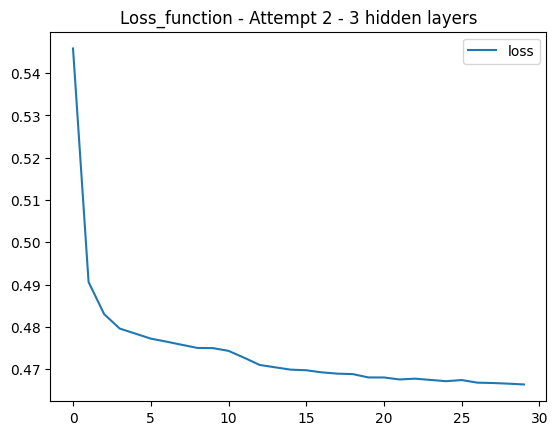

In [ ]:
# Plotting the loss function
import matplotlib.pyplot as plt
plt.plot(fit_model.history["loss"])
plt.title("Loss_function - Attempt 2 - 3 hidden layers")
plt.legend(["loss"])

# Saving the plot to a file in the 'Output' folder
plt.savefig(os.path.join("Output", "Attempt2_Loss_Plot.png"))

plt.show()

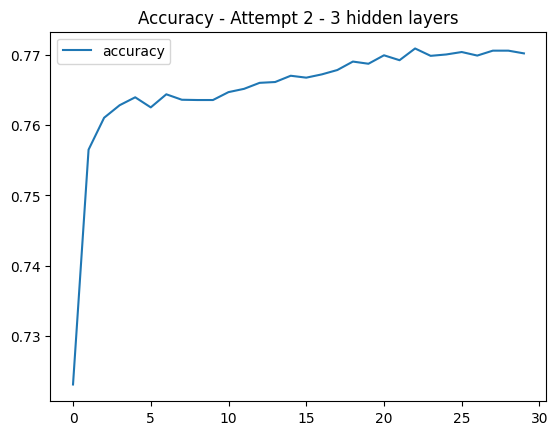

In [ ]:
# Plotting the accuracy
plt.plot(fit_model.history["accuracy"])
plt.title("Accuracy - Attempt 2 - 3 hidden layers")
plt.legend(["accuracy"])

# Saving the plot to a file in the 'output' folder
plt.savefig(os.path.join("Output", "Attempt2_Accuracy_Plot.png"))

plt.show()

In [ ]:
# Exporting model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_Attempt2.h5")

## Summary
#### The deep learning model results highlight the ongoing need for optimization efforts. **Attempt 1** yielded an accuracy of **72.58%**, and **Attempt 2** showed a notable improvement with an accuracy of **76.18%**, surpassing the targeted **75%**. In **Attempt 2**, the neural network architecture was refined with the inclusion of three hidden layers comprising **8**, **10**, and **12** nodes, respectively, each activated by the **RELU** (Rectified Linear Unit) activation function. This architectural adjustment, coupled with the utilization of the **SIGMOID** activation function in the output layer, contributed to the observed improvement in accuracy. The **SIGMOID** activation function, employed in the output layer, is well-suited for binary classification tasks, providing a probability-like output that aids in distinguishing between classes. The model was trained over **30 epochs**, allowing it to iteratively adjust its weights to better capture the underlying patterns in the training data. As the model's performance is sensitive to data quality, there is a recommendation to further explore enhancements in data preprocessing and feature engineering to potentially boost accuracy. Additionally, extending the training epochs and experimenting with alternative activation functions may further contribute to model refinement. These results emphasize the iterative nature of model development, prompting a comprehensive exploration of alternative models and fine-tuning strategies in future iterations to consistently meet or exceed Alphabet Soup's accuracy objectives.